In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
import os

os.chdir("/content/drive/MyDrive/Colab Notebooks/DMC PROYECTO")

In [37]:
!ls

'apriori_dmc (1).ipynb'			 rules_cluster_0.xlsx
 apriori_dmc_v1.ipynb			 rules_cluster_1.xlsx
 output.xlsx				 rules_cluster_2.xlsx
'proyecto BI - data - entregable.xlsx'


#LIBRERIAS

In [4]:
import pandas as pd
import numpy as np

# CODIGO 1

## LEER FILES

In [5]:
data = pd.read_excel('proyecto BI - data - entregable.xlsx' , sheet_name= 'base_trx' )

## EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437074 entries, 0 to 437073
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   periodo            437074 non-null  int64         
 1   fecha_facturacion  437074 non-null  datetime64[ns]
 2   cod_encriptado     437074 non-null  int64         
 3   DISTRITO           437074 non-null  object        
 4   category           437074 non-null  object        
 5   sku                437074 non-null  object        
 6   ID_SKU             437074 non-null  int64         
 7   venta_soles_vf     437074 non-null  float64       
 8   centa_ton_vf       437074 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 30.0+ MB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
periodo,437074.0,202162.187938,49.732751,202101.0000,202108.0000,202202.0000,202207.0000,202212.0000
cod_encriptado,437074.0,112079.826382,699.574559,111111.0000,111507.0000,111953.0000,112555.0000,114258.0000
ID_SKU,437074.0,37.384626,27.661385,1.0000,15.0000,31.0000,52.0000,100.0000
venta_soles_vf,437074.0,59.471698,186.711762,-6353.1456,8.4768,22.8576,49.6608,34914.3552
centa_ton_vf,437074.0,11.058085,26.540604,0.0000,2.0000,5.0000,12.0000,3662.0000


In [8]:
data.head(3)

,periodo,fecha_facturacion,cod_encriptado,DISTRITO,category,sku,ID_SKU,venta_soles_vf,centa_ton_vf
0,202101,2021-01-01,111111,SAN ANTONIO,ACEITE A GRANEL,ACEIT. CIL FS CC 20LT 1BLD,1,91.2192,18.31
1,202101,2021-01-01,111111,SAN ANTONIO,CEREALES FS,FRIJOL NICOLINI 1KG 6BOL,2,23.3280,3.00
2,202101,2021-01-01,111111,SAN ANTONIO,LAVAVAJILLAS INTRADEVCO,LAVAV. PROF.SAPOLIO AB LIMON 1KG.6FCO,3,23.0208,6.00


In [9]:
#data['cod_encriptado'] = data['cod_encriptado'].astype(int)

In [10]:
data.category.value_counts()

PASTAS                           83550
ACEITE A GRANEL                  78553
SALSAS GASTRONOMÍA               67304
AYUDAS CULINARIAS                46695
LAVAVAJILLAS INTRADEVCO          30830
LEJÍAS                           27079
DETERGENTES INTRADEVCO           26235
GALLETAS                         14774
LIMPIADORES LIGHT DUTY           13845
MARGARINAS INDUSTRIALES           9468
HARINAS INDUSTRIALES              7109
LIMPIADORES ESPECIALIZADOS        6996
CUIDADO DE LA PIEL INTRADEVCO     6062
CEREALES FS                       5803
DESCARTABLES SSCC                 5687
KIKKO                             2109
CONGELADOS                        1810
EXPORTADORA ROMEX                 1074
HARINAS DOMÉSTICAS                 696
MANTECAS INDUSTRIALES              587
AVINKA                             536
PANETONES                          272
Name: category, dtype: int64

In [11]:

# https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe

df_cat = data[['category']].value_counts().rename_axis('Categorias').reset_index(name='counts')

df_cat.head()

,Categorias,counts
0,PASTAS,83550
1,ACEITE A GRANEL,78553
2,SALSAS GASTRONOMÍA,67304
3,AYUDAS CULINARIAS,46695
4,LAVAVAJILLAS INTRADEVCO,30830


In [12]:
# https://stackoverflow.com/questions/53577630/how-to-make-pareto-chart-in-python

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

df_cat = df_cat.sort_values(by='counts',ascending=False)
df_cat["cumpercentage"] = df_cat['counts'].cumsum() / df_cat['counts'].sum()*100

df_cat.head()


,Categorias,counts,cumpercentage
0,PASTAS,83550,19.115756
1,ACEITE A GRANEL,78553,37.088228
2,SALSAS GASTRONOMÍA,67304,52.486993
3,AYUDAS CULINARIAS,46695,63.170539
4,LAVAVAJILLAS INTRADEVCO,30830,70.224264


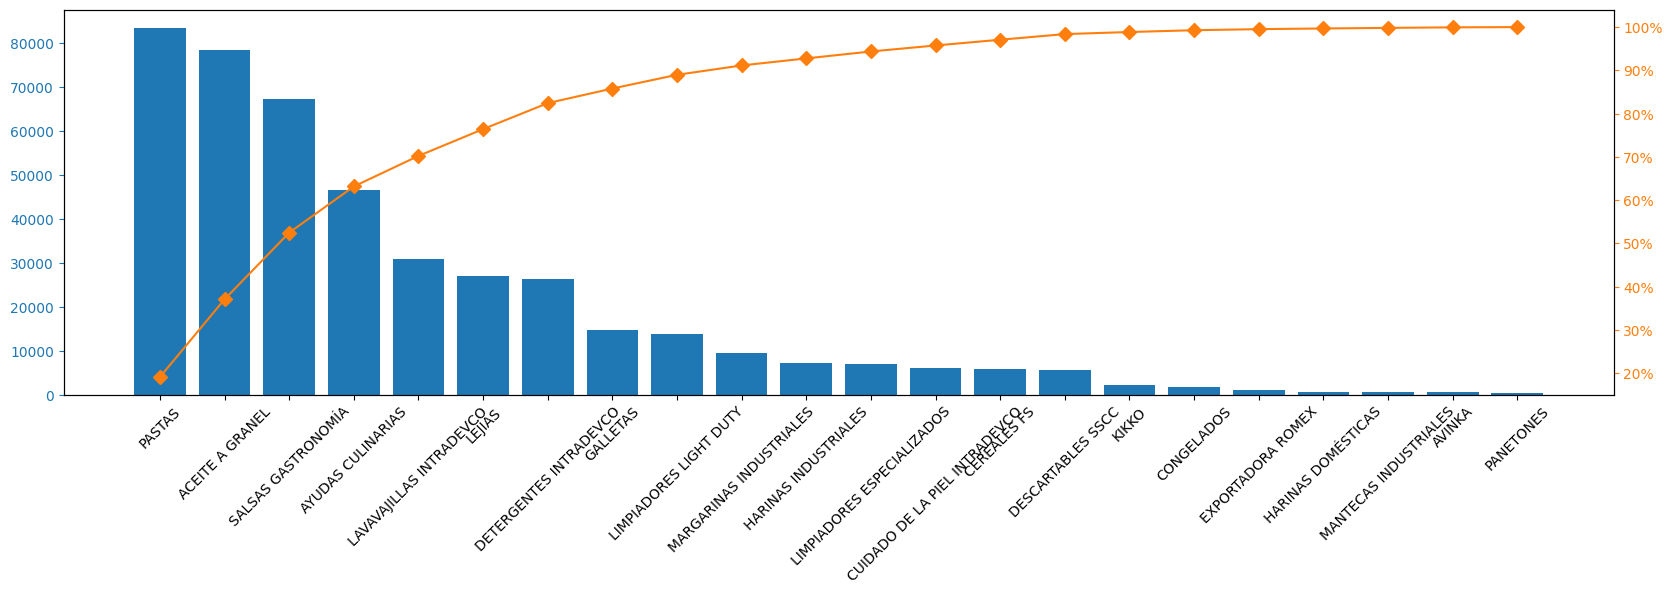

In [13]:
fig, ax = plt.subplots(figsize=(20,5))

ax.bar(df_cat[ 'Categorias'], df_cat['counts'], color="C0")

ax2 = ax.twinx()
ax2.plot(df_cat[ 'Categorias']  , df_cat["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.show()

## PARTE 1

In [14]:
# creamos la key

data['InvoiceNo'] = data['cod_encriptado'].map(str) + '-' + data['fecha_facturacion'].map(str)

data.head(3)

,periodo,fecha_facturacion,cod_encriptado,DISTRITO,category,sku,ID_SKU,venta_soles_vf,centa_ton_vf,InvoiceNo
0,202101,2021-01-01,111111,SAN ANTONIO,ACEITE A GRANEL,ACEIT. CIL FS CC 20LT 1BLD,1,91.2192,18.31,111111-2021-01-01 00:00:00
1,202101,2021-01-01,111111,SAN ANTONIO,CEREALES FS,FRIJOL NICOLINI 1KG 6BOL,2,23.3280,3.00,111111-2021-01-01 00:00:00
2,202101,2021-01-01,111111,SAN ANTONIO,LAVAVAJILLAS INTRADEVCO,LAVAV. PROF.SAPOLIO AB LIMON 1KG.6FCO,3,23.0208,6.00,111111-2021-01-01 00:00:00


In [15]:
# quitamos devoluciones

data = data[ data['venta_soles_vf'] > 0 ]

In [16]:
# PARTE AÑADIDA LUEGO DE HACER EL CLUSTER DE DISTRITOS

DIC = {
    'PUNTA NEGRA' : 2,
'ASIA' : 0,
'RICARDO PALMA' : 2,
'BELLAVISTA' : 0,
'RIMAC' : 2,
'SAN BORJA' : 2,
'SAN MARTIN DE PORRES' : 2,
'SANTA ROSA' : 2,
'VENTANILLA' : 2,
'ANCON' : 1,
'ATE' : 1,
'INDEPENDENCIA' : 0,
'JESUS MARIA' : 0,
'LA MOLINA' : 0,
'BREÑA' : 1,
'CARABAYLLO' : 1,
'LOS OLIVOS' : 0,
'CHACLACAYO' : 1,
'LURIN' : 0,
'MAGDALENA DEL MAR' : 0,
'MALA' : 0,
'PACHACAMAC' : 0,
'CHILCA' : 1,
'PUEBLO LIBRE' : 0,
'CHORRILLOS' : 1,
'PUNTA HERMOSA' : 0,
'COMAS' : 1,
'EL AGUSTINO' : 1,
'LA VICTORIA' : 1,
'SAN ANTONIO' : 0,
'LIMA' : 1,
'LURIGANCHO' : 1,
'PUCUSANA' : 1,
'PUENTE PIEDRA' : 1,
'SAN BARTOLO' : 1,
'SAN JUAN DE LURIGANC' : 1,
'SAN MIGUEL' : 0,
'SAN JUAN DE MIRAFLOR' : 1,
'SANTA CRUZ DE FLORES' : 0,
'SANTA EULALIA' : 0,
'SAN LUIS' : 1,
'SANTA ANITA' : 1,
'VILLA EL SALVADOR' : 1,
'VILLA MARIA DEL TRIU' : 1

}

In [17]:
# https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict-preserve-nans

data['cluster'] = data['DISTRITO'].map(DIC)

In [18]:
data.head(3)

,periodo,fecha_facturacion,cod_encriptado,DISTRITO,category,sku,ID_SKU,venta_soles_vf,centa_ton_vf,InvoiceNo,cluster
0,202101,2021-01-01,111111,SAN ANTONIO,ACEITE A GRANEL,ACEIT. CIL FS CC 20LT 1BLD,1,91.2192,18.31,111111-2021-01-01 00:00:00,0
1,202101,2021-01-01,111111,SAN ANTONIO,CEREALES FS,FRIJOL NICOLINI 1KG 6BOL,2,23.3280,3.00,111111-2021-01-01 00:00:00,0
2,202101,2021-01-01,111111,SAN ANTONIO,LAVAVAJILLAS INTRADEVCO,LAVAV. PROF.SAPOLIO AB LIMON 1KG.6FCO,3,23.0208,6.00,111111-2021-01-01 00:00:00,0


In [19]:
# SEPARAR PARA DEJAR UN MES PARA SIMNULAR AUMENTO DE TICKET CON EL MBA

data_train = data[ data['fecha_facturacion'] < '2022-12-01' ]

data_simu = data[ data['fecha_facturacion'] >= '2022-12-01' ]


In [20]:
#data_train.fecha_facturacion.describe()

In [21]:
# se separan las TRX por cluster - TRAIN

df_train_clust_0 = data_train[data_train['cluster']== 0 ]

df_train_clust_1 = data_train[data_train['cluster']== 1 ]

df_train_clust_2 = data_train[data_train['cluster']== 2 ]

In [22]:
# se separan las TRX por cluster - SIMU

df_simu_clust_0 = data_simu[data_simu['cluster']== 0 ]

df_simu_clust_1 = data_simu[data_simu['cluster']== 1 ]

df_simu_clust_2 = data_simu[data_simu['cluster']== 2 ]

In [23]:
#df_simu_clust_2.head(3)

In [24]:
df_simu_clust_1[ df_simu_clust_1['venta_soles_vf'] >0 ].venta_soles_vf.sum()

963831.84

# PARTE 2 - APRIORI AUTO

Se crean las reglas de recomendacion por cluster



In [25]:
# data por sku

data_sku = data.groupby(['sku','ID_SKU','category'])['periodo'].count().reset_index(name='counts')

data_sku.head()

,sku,ID_SKU,category,counts
0,ACEIT. CIL FS 20LT 1BLD,87,ACEITE A GRANEL,113
1,ACEIT. CIL FS CC 20LT 1BLD,1,ACEITE A GRANEL,3609
2,ACEIT. CIL FS SMI 5LT 4BDN,34,ACEITE A GRANEL,1457
3,ACEIT. COCINERO FS 20L 1BLD,4,ACEITE A GRANEL,3131
4,ACEIT. COCINERO FS 5L 4BDN SMI,35,ACEITE A GRANEL,2591


In [26]:
data_sku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sku       100 non-null    object
 1   ID_SKU    100 non-null    int64 
 2   category  100 non-null    object
 3   counts    100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [27]:
from mlxtend.frequent_patterns import apriori

from mlxtend.frequent_patterns import association_rules

In [28]:
def encode_units(x):
  if x <= 0:
    a = 0
  else:
    a = 1
  
  return a


def join_l(x):

  str1 = [str(i) for i in x]
  a = "/".join(str1)
  return a


def market_basket(df, data_sku):

  basket = (df.groupby(['InvoiceNo', 'sku' ])['venta_soles_vf']
               .sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
        
  basket_encode = basket.applymap(encode_units)

  # nos quedamos con las compras con 2 o mas items

  basket_filter = basket_encode[(basket_encode > 0).sum(axis=1) >= 2]

  basket_filter = basket_filter.replace(np.nan,0)

  # Compute frequent itemsets using the Apriori algorithm
  frequent_itemsets_plus = apriori(basket_filter, 
                                   min_support= 0.01, 
                                   max_len = 5, 
                                  use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

  frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))

  # association_rules

  rules = association_rules(frequent_itemsets_plus, 
                            metric='lift', 
                            min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)


  rules["antecedents"] = rules["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

  rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x))).astype("unicode")

  #
  s1 = pd.merge(rules, data_sku, how='left', left_on='antecedents', right_on='sku')

  s1['ant_ID_SKU'] = s1['ID_SKU']

  s1.drop(['sku', 'counts','ID_SKU'], axis=1, inplace= True)

  #
  s2 = pd.merge(s1, data_sku, how='left', left_on='consequents', right_on='sku')

  s2['con_ID_SKU'] = s2['ID_SKU']

  s2.drop(['sku', 'counts','ID_SKU'], axis=1, inplace= True)

  # KEY OF RULES

  add = s2[['ant_ID_SKU', 'con_ID_SKU']]

  add['key'] = add.values.tolist()

  add['key_2'] = add.key.sort_values().apply(lambda x: sorted(x))

  add = add[['key_2']]

  #
  s4 = pd.concat([ s2, add ], axis=1)

  r1 = lambda x: join_l(x)
  s4['key_3'] = s4['key_2'].apply(r1)

  #
  s4["rank"] = s4.groupby("key_3")["confidence"].rank(method="dense", ascending=False)

  #
  s5 = s4[ s4['rank'] == 1]

  return s5


In [29]:
rules_clust_0 = market_basket(df_train_clust_0, data_sku) 

rules_clust_1 = market_basket(df_train_clust_1, data_sku) 

rules_clust_2 = market_basket(df_train_clust_2, data_sku) 

<ipython-input-28-69d9a2b670a8>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add['key'] = add.values.tolist()
<ipython-input-28-69d9a2b670a8>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add['key_2'] = add.key.sort_values().apply(lambda x: sorted(x))
<ipython-input-28-69d9a2b670a8>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [30]:
# cantidad de reglas

print(f'cantidad de reglas en cluster 0 {rules_clust_0.shape[0]}', '\n')

print(f'cantidad de reglas en cluster 1 {rules_clust_1.shape[0]}' , '\n')

print(f'cantidad de reglas en cluster 2 {rules_clust_2.shape[0]}' , '\n')

cantidad de reglas en cluster 0 188 

cantidad de reglas en cluster 1 141 

cantidad de reglas en cluster 2 111 



In [31]:
rules_clust_1.head(3) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,category_x,ant_ID_SKU,category_y,con_ID_SKU,key_2,key_3,rank
0,PASTA. NICOLINI TORNILL. 250GR 20BOL,"PASTA. NICOLINI RIGATONI 250GR 20BOL, PASTA. N...",0.036151,0.022765,0.010534,0.291376,12.799156,0.009711,1.379060,PASTAS,27.0,NaN,NaN,"[27.0, nan]",27.0/nan,1.0
1,"PASTA. NICOLINI RIGATONI 250GR 20BOL, PASTA. N...",PASTA. NICOLINI TORNILL. 250GR 20BOL,0.022765,0.036151,0.010534,0.462704,12.799156,0.009711,1.793888,NaN,NaN,PASTAS,27.0,"[nan, 27.0]",nan/27.0,1.0
2,"PASTA. NICOLINI RIGATONI 250GR 20BOL, PASTA. N...",PASTA. NICOLINI COD.RAY 250GR 20BOL,0.020072,0.046552,0.010534,0.524785,11.273086,0.009599,2.006352,NaN,NaN,PASTAS,24.0,"[nan, 24.0]",nan/24.0,1.0


In [32]:
## REVISAR luego !!!!

#GET SKU PARA LAS REGLAS QUE TIENEN COMO ANTECEDENTE O CONSECUENTE MÁS DE 1 ITEM -> VER FUNCTION MBA PARTE SKU

In [34]:
# exportar reglas

#rules_clust_0.to_excel("rules_cluster_0.xlsx")  

rules_clust_1.to_excel("rules_cluster_1.xlsx")  

#rules_clust_2.to_excel("rules_cluster_2.xlsx")  

# simular cluster 1

In [ ]:
print(df_simu_clust_0.shape, '\n')
print(df_simu_clust_1.shape, '\n')
print(df_simu_clust_2.shape, '\n')

(3256, 11) 

(13985, 11) 

(442, 11) 



In [ ]:
#df_simu_clust_1.head(3)

In [ ]:
# https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan

# me quedo con las reglas que tienen identificados lo sku antecedenetes y consecuente
 # para este caso en particular, seran las reglas de asociacion 1:1, no las multiples antecedentes -> consecuentes

rules_clean_cluster_1 = rules_clust_1[ (rules_clust_1['ant_ID_SKU'].notna() ) &  (rules_clust_1['con_ID_SKU'].notna() ) ]

In [ ]:
#rules_clean_cluster_1.shape

#rules_clean_cluster_1.head(2)

In [ ]:
# funcionamiento de la simulacion:

# 1. para simular, se asume probabilidad del 30% q cliente compre algun item de la recomendacion
  # esta probabilidad (distribucion) se puede calcular/afinar haciendo un periodo de prueba o piloto con el motor de recomendacion

# 2. para la simulacion se asume que el cliente solo elige 1 item al azar de la recomendacion

# 3. se toma el promedio de las ventas por sku para simular el aumento del ticket al comprar sku recomendado
  # se puede mejorar la logica de simulacion al ajustar este monto con el monto real comprado de los otros items
  # por ejemplo, si el monto de los sku reales es menor al promedio, el monto del sku recomendado lo mas probable sigue esa tendencia



In [ ]:
# https://stackoverflow.com/questions/22219004/how-to-group-dataframe-rows-into-list-in-pandas-groupby

facturas_sku = df_simu_clust_1.groupby(['InvoiceNo'])['ID_SKU'].apply(list).reset_index(name='basket_cliente')

facturas_sku.head(3)

,InvoiceNo,basket_cliente
0,111112-2022-12-01 00:00:00,"[20, 100, 7, 9, 91, 13]"
1,111112-2022-12-08 00:00:00,"[7, 9]"
2,111112-2022-12-22 00:00:00,"[30, 100, 50, 10, 91, 12]"


In [ ]:
facturas_mto = df_simu_clust_1.groupby(['InvoiceNo'])['venta_soles_vf'].sum().reset_index(name='mto_basket_cliente')

facturas_mto.head(3)

,InvoiceNo,mto_basket_cliente
0,111112-2022-12-01 00:00:00,857.3184
1,111112-2022-12-08 00:00:00,81.6096
2,111112-2022-12-22 00:00:00,329.6544


In [ ]:
facturas_v1 = pd.merge(facturas_sku, facturas_mto, how='left', left_on='InvoiceNo', right_on='InvoiceNo')

facturas_v1.head(3)

,InvoiceNo,basket_cliente,mto_basket_cliente
0,111112-2022-12-01 00:00:00,"[20, 100, 7, 9, 91, 13]",857.3184
1,111112-2022-12-08 00:00:00,"[7, 9]",81.6096
2,111112-2022-12-22 00:00:00,"[30, 100, 50, 10, 91, 12]",329.6544


## functions

In [ ]:
# https://cmdlinetips.com/2021/04/convert-two-column-values-from-pandas-dataframe-to-a-dictionary/

def rules_agg(rules_df):

  rules_agg = rules_df.groupby(['ant_ID_SKU'])['con_ID_SKU'].apply(list).reset_index(name='all_conseq')

  # permite ver la importancia de ordenar las recomedanciones en la web segun alguna metrica de recomendacion como support

  dic_v1 = dict(zip(rules_agg.ant_ID_SKU, rules_agg.all_conseq)) # pasar a diccionario pasando columnas a key : value

  return dic_v1 


In [ ]:
# DETERMINAR TODAS LAS RECOMENDACIONES 1:1 DADOS TODOS LOS ANTECEDENTES EN UN TICKET

# https://stackoverflow.com/questions/41125909/python-find-elements-in-one-list-that-are-not-in-the-other

def find_recomend( basket: list, rules):

  recomend_all = []

  for sku_ant in basket:
    try:
      recomend = rules[sku_ant]

      recomend_all.append(recomend)
    except:
      pass # para skus nuevos que no estan en el MBA

  flat_list = [item for sublist in  recomend_all for item in sublist]

  recomend_all_unique = set(flat_list)

  recomend_all_unique = list( recomend_all_unique - set(basket)) # recomendaciones no en antecedentes brindados

  return recomend_all_unique

In [ ]:
# https://pynative.com/python-random-randrange/#:~:text=Use%20a%20random.randint(),8%20%2C9%2C%2010%5D.

import random

# EL RANDOM ES PARA SIMULAR EL COMPORTAMIENTO DEL CLIENTE, NO EL DE LA RECOMENDACION

def choose_recomend( recommend :list):

  if recommend: # checks if list is not empty -> significa que NO HUBO RECOMENDACION ! -> REVISAR
    
    len_options = len(recommend)

    if len_options < 2:
      option = recommend[0]
    else:
      rand_recommend = random.randint(0, len_options -1 )
      option = recommend[rand_recommend]
  
  else:
    option = 1112223

  return option


In [ ]:
#facturas_v1.describe(include=object)

#facturas_v1.describe()

In [ ]:
def frequent_items(df, data_sku):

  basket = (df.groupby(['InvoiceNo', 'sku' ])['venta_soles_vf']
               .sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
        
  basket_encode = basket.applymap(encode_units)

  # nos quedamos con las compras con 2 o mas items

  basket_filter = basket_encode[(basket_encode > 0).sum(axis=1) >= 2]

  basket_filter = basket_filter.replace(np.nan,0)

  # Compute frequent itemsets using the Apriori algorithm
  frequent_itemsets_plus = apriori(basket_filter, 
                                   min_support= 0.01, 
                                   max_len = 5, 
                                  use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

  frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))

  frequent_itemsets_plus["itemsets"] = frequent_itemsets_plus["itemsets"].apply(lambda x: ', '.join(list(x))).astype("unicode")

  # nos quedamos con recomendaciones 1:1
  frequent_itemsets_plus = frequent_itemsets_plus[ frequent_itemsets_plus['length'] == 1]

  return frequent_itemsets_plus

In [ ]:
def choose_recomend_top( current_cart :list , top_products :list):
    
  available_options = list(  set(top_products) - set(current_cart)  )

  len_options = len(available_options)

  rand_recommend = random.randint(0, len_options -1 )

  option = available_options[rand_recommend]
  
  return option

# tener cuidado si todos los top ya estan dentro del carrito del cliente, saldra error pues no podra recomendar otra cosa

In [ ]:
# ESCENARIO DE CONVERSION

# https://towardsdatascience.com/business-simulations-with-python-a70d6cba92c8

'''def get_conversion_rate(expected, stdev):
    conversion_rate = max(expected + np.random.normal()*stdev, 
                          0.000001)
    return conversion_rate
'''

# https://stackoverflow.com/questions/47012474/bernoulli-random-number-generator

def get_conversion_rate_bernoulli(size, expected):
    conversion_rate = np.random.binomial(size = size, n=1, p= expected)

    return conversion_rate

## continue

In [ ]:
# analizar ventas promedio por sku

sku_prom = data_train.groupby(['ID_SKU'])['venta_soles_vf'].mean().reset_index(name='prom_venta_sku')

#sku_prom.head()


In [ ]:
rules_arg = rules_agg(rules_clean_cluster_1)

#rules_arg

In [ ]:

facturas_v1['recomedanciones'] = facturas_v1['basket_cliente'].apply(lambda x : find_recomend( x, rules_arg  ))

facturas_v1.head(3)

,InvoiceNo,basket_cliente,mto_basket_cliente,recomedanciones
0,111112-2022-12-01 00:00:00,"[20, 100, 7, 9, 91, 13]",857.3184,"[3.0, 40.0, 26.0, 29.0, 95.0]"
1,111112-2022-12-08 00:00:00,"[7, 9]",81.6096,[3.0]
2,111112-2022-12-22 00:00:00,"[30, 100, 50, 10, 91, 12]",329.6544,"[3.0, 26.0, 40.0, 9.0, 44.0, 15.0, 16.0, 58.0,..."


In [ ]:
# elegimos top productos por support

freq_items_clust_1 = frequent_items(df_train_clust_1, data_sku)

top_prods = freq_items_clust_1[ freq_items_clust_1['support'] > 0.10]

#
top_prods_2 = pd.merge(top_prods , data_sku , how='left', left_on='itemsets', right_on='sku')

# get list of sku ids of TOP 10 products

top_prods_list = list(top_prods_2['ID_SKU'])

top_prods_list

[3, 9, 26, 95, 42, 16, 15, 44, 29, 12]

## SIMU FINAL

In [ ]:

# Python program to get average of a list
def Average(lst):
    return sum(lst) / len(lst)


prob_conversion = [0.10, 0.20, 0.30, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

results_escenarios = []

for prob_i in prob_conversion:

  results_escenarios_in = []

  for i in range(100):

    # simular que el cliente solo escoge 1 recomendacion

    facturas_v1['pick_recommend'] = facturas_v1['recomedanciones'].apply(lambda x : choose_recomend( x ))

    facturas_v1['pick_recommend'] = pd.to_numeric(facturas_v1['pick_recommend']) 

    #facturas_v1.head(3)

    # RECOMENDAR TOP PRODUCTOS A LOS QUE no TUVIERON 1RA RECOMENDACION

    facturas_v1_A = facturas_v1[ facturas_v1['pick_recommend'] != 1112223]

    facturas_v1_B = facturas_v1[ facturas_v1['pick_recommend'] == 1112223]

    # simular que el cliente solo exscoge 1 recomendacion

    facturas_v1_B['pick_recommend'] = facturas_v1_B['basket_cliente'].apply(lambda x : choose_recomend_top( x , top_prods_list ))

    #facturas_v1_B.head(3)

    # VOLVER A UNIFICAR LA DATA

    facturas_v1 = pd.concat( [facturas_v1_A  ,facturas_v1_B ])

    #facturas_v1.shape

    # PROBABILIDAD DE CONVERSION
    
    cant_facturas = facturas_v1.shape[0]


    # simular la probabilida de compra del item seleccionado

    prob_list = get_conversion_rate_bernoulli(  cant_facturas , prob_i )

    #

    facturas_v1['prob compra'] = prob_list

    #facturas_v1.head(3)

    facturas_v2 = pd.merge(facturas_v1, sku_prom, how='left', left_on='pick_recommend', right_on='ID_SKU')

    #facturas_v2.head(3)

    # cleaning
    facturas_v2['prom_venta_sku'] = facturas_v2['prom_venta_sku'].fillna(0)

    # monto
    facturas_v2['venta recommend'] = facturas_v2['prom_venta_sku']*facturas_v2['prob compra']

    #facturas_v2.head(3)

    # MTO TOTAL INCLUYENDO RECOMENDACION

    facturas_v2['venta recommend final'] = facturas_v2['venta recommend'] + facturas_v2['mto_basket_cliente']

    #facturas_v2.head(3)

    # analizar incremento de ticket promedio e incremento de ventas ( no se considero data de devoluciones)

    resultados_cluster_1 = facturas_v2[['venta recommend final', 'mto_basket_cliente']].sum()

    #resultados_cluster_1

    resultados_CLUSTER_1 =  ( resultados_cluster_1[0] - resultados_cluster_1[1] ) / resultados_cluster_1[1]

    resultados_CLUSTER_1 = round(resultados_CLUSTER_1*100,4)

    #print(f'Se logra un incremento en ventas de {round(resultados_CLUSTER_1*100,2)}%')

    results_escenarios_in.append( resultados_CLUSTER_1 )

  results_escenarios.append(Average(results_escenarios_in))


## resultados

In [ ]:
results_escenarios


[1.5457139999999996,
 3.0822999999999996,
 4.616186000000003,
 6.190643,
 7.730772999999999,
 9.268845,
 10.822771999999995,
 12.403178999999998,
 13.936953000000006,
 15.457977000000003]